# Space Data Vizualization : 

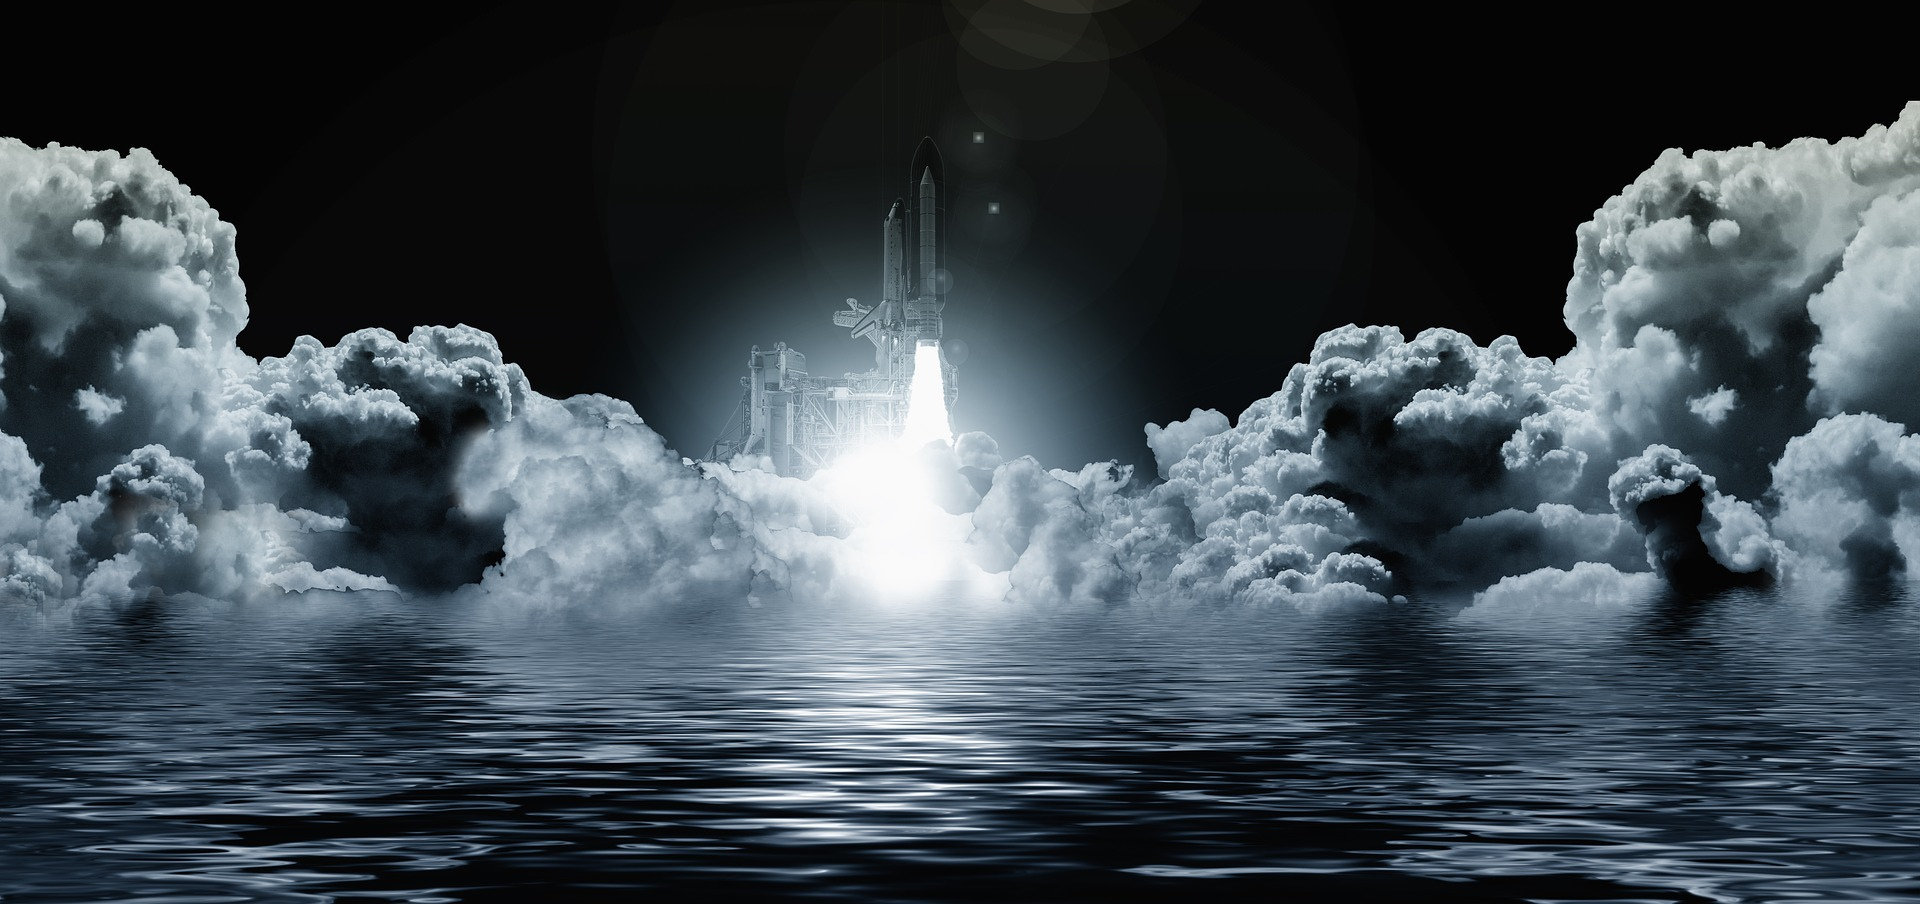

# About the Data : 

This data consists **all Space Missions from 1957.** This visualization is gonna be very interesting for any space lovers...

**Few features of the data are :**

* Company Name
* Location	
* Time and data of launching
* Rocket Status
* Mission cost etc...

# Topics : 

Here we are going to visualize -

1. Active and Retired Rockets 
2. Type of Missions 
3. No of missions according to Places and their relative frequency plot 
4. No of missions according to locations and their relative frequency plot 
5. No of missions according to top 50 launch complex and their relative frequency plot
6. Total launches from top 50 launch vehicles 
7. Total launches on each day from 1957 
8. Launches during the day :
9. Launches in every year from 1957 and their relative frequency plot
10. Top 15 Launch centers in the world 
11. Money spent by each company 
12. 12. Heatmap of days and months 
13. Heatmap of months and years 
14. Animated Map 

# Import Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
plt.style.use(['dark_background'])
import plotly.express as px
import matplotlib.patches as mpatches
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

# Data Cleaning Section : 

Unnamed: 0 and Unnamed: 0.1 are pretty useless columns so we dropped them and 

Rocket is basically the mission cost in $ Million so we renamed the column as Mission Cost 

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1, inplace = True)
df.rename(columns = {' Rocket' : 'Mission Cost'}, inplace = True)

There are so many information in one column such that the location, space centre and launch complex...

So we prefer to allot seperate columns for each of them 

In [ ]:
Location = df.Location.str.split(',', expand = True)
Location

So we can see there is so many missing values in the 4th column. 

But we can fill them using the data from the previous coulmn...

In [ ]:
Location[3].isnull().sum()

Filling the missing values...

In [ ]:
for i in range(len(Location)) : 
    if Location[3].loc[i] == None : 
        for x in Location[2].unique() : 
            if Location[2].loc[i] == x :
                Location[3].loc[i] = x
Location

In [ ]:
# alloting different columns 
df['Places'] = Location[3]
df['Location'] = Location[2]
df['Space Centre'] =Location[1]
df['Launch Complex'] = Location[0]

In [ ]:
# Doing the same for datum
Datum = df.Datum.str.split(' ', expand = True) 
Datum

In [ ]:
# alloting seperate columns 
df['Launch Date'] = Datum[2]
# as there is ',' in the launch date column
df['Launch Date'].replace([','],'', regex= True, inplace = True)
df['Launch Month'] = Datum[1]
df['Launch Year'] = Datum[3]
df['Launch Time'] = Datum[4]
df['Launch Day'] = Datum[0]
df.drop(['Datum'], axis = 1, inplace = True)

Adding a new column wrt Launch Time 

In [ ]:
df['Launch Time'].replace(':','.',regex = True, inplace = True)
df['Launch Time'] = pd.to_numeric(df['Launch Time'])
df["Time"] = pd.cut(df['Launch Time'] ,
                    bins = [0 , 4.30 ,7.00,12.00,18.00,20.00,23.59] ,
                                 labels = ['Mid Night','Early Morning','Morning','Afternoon', 'Evening','Night'])

There are two datas in the details column. 

1. Launch Vehicle 

2. Satellite

In [ ]:
# doing same for details 
detail = df.Detail.str.split('|', expand = True)
detail

In [ ]:
df['Launch vehicle'] = detail[0]
df['Satellite'] = detail[1]
df.drop(['Detail'], axis = 1, inplace = True)

In [ ]:
df.columns = df.columns.str.replace(" " , "_") 
# removed space and added _ for better access 
df.Mission_Cost.replace([','], '',regex = True, inplace = True)

All the data are **object type.** 

So now we need to turn a few of them to **numeric** 

In [ ]:
df.Mission_Cost = pd.to_numeric(df.Mission_Cost)
df.Launch_Year = pd.to_numeric(df.Launch_Year)
df.Launch_Date = pd.to_numeric(df.Launch_Date)

In [ ]:
df.info()

In [ ]:
df.head()

# Functions : 

Here we defined 3 functions- 

1. For size 

2. For bar plot 

3. For relative bar Plot 

In [ ]:
# for size of the plots
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);

# Visualization with bar plot 
def visualize(name,state, palette,xlabel,ylabel,title) : 
    df1 = df.groupby(name).count()
    df1.reset_index(inplace = True)
    df1.sort_values(by = 'Satellite', ascending = False, inplace = True)
    if state == 'v' : 
        if palette == 'copper': # using different color options
            plot = sns.barplot(x = name, y ='Satellite',
                               data = df1.head(50), palette ='copper');
        elif palette == 'summer':
            plot = sns.barplot(x = name, y ='Satellite',
                               data = df1.head(50), palette ='summer');
        elif palette == 'winter':
            plot = sns.barplot(x = name, y ='Satellite',
                               data = df1.head(50), palette ='winter');
        elif palette == 'spring':
            plot = sns.barplot(x = name, y ='Satellite',
                               data = df1.head(50), palette ='spring');
        else :
            plot = sns.barplot(x = name, y ='Satellite',
                               data = df1.head(50));
        plt.xlabel(xlabel);
        plt.ylabel(ylabel);
        plt.title(title);
    elif state == 'h' : #different orientation
        if palette == 'BuGn':
            plot = sns.barplot(y = name, x ='Satellite',
                               data = df1.head(50), orient = 'h', palette ='BuGn');
        elif palette == 'summer':
            plot = sns.barplot(y = name, x ='Satellite',
                               data = df1.head(50), orient = 'h', palette ='summer');
        elif palette == 'winter':
            plot = sns.barplot(y = name, x ='Satellite',
                               data = df1.head(50), orient = 'h', palette ='winter');
        elif palette == 'spring':
            plot = sns.barplot(y = name, x ='Satellite',
                               data = df1.head(50), orient = 'h', palette ='spring');
        else :
            plot = sns.barplot(y = name, x ='Satellite',
                               orient = 'h', data = df1.head(50));
        plt.ylabel(xlabel);
        plt.xlabel(ylabel);
        plt.title(title);
    plt.xticks(rotation=90);
    return plot

# for relative bar plot
def relative_bar(name, xlabel) : 
#    preparing dataframe 
    data = df[[ name ,'Status_Mission',
                    'Company_Name']].groupby([name,'Status_Mission']).count()
    data.reset_index(inplace = True)
    data = data.pivot(index = name,
                                columns ='Status_Mission', values = 'Company_Name')
    data.fillna(value = 0, inplace = True)
    data = data.astype(int)
    data.sort_values(by='Success', ascending = False, inplace = True)
    data = data.head(50)
#     adding seperate columns to the dataframe
    data['Total'] = data.sum(axis=1)
    data['SuccessFraction'] = data['Success'] / data['Total']
    data['PrelaunchFraction'] = data['Prelaunch Failure'] / data['Total']
    data['PartialFraction'] = data['Partial Failure'] / data['Total']
    data['FailureFraction'] = data['Failure'] / data['Total']
#     plot
    plt.bar(data.index, data.SuccessFraction, color = '#00d11f');
    plt.bar(data.index, data.PrelaunchFraction,
            bottom=data.SuccessFraction, color ='#0353ff');
    plt.bar(data.index, data.PartialFraction,
            bottom = data.SuccessFraction + data.PrelaunchFraction, color = '#ff9a03');
    plt.bar(data.index, data.FailureFraction,
            bottom = data.SuccessFraction + data.PrelaunchFraction + data.PartialFraction, color = '#ff0303' );
    plt.xticks(rotation= 90);
    plt.xlabel(xlabel);
    plt.ylabel('Relative Frequency');
    plt.title('Relative Success Rate');
#     legend box 
    green = mpatches.Patch(color='#00d11f', label='Success');
    blue = mpatches.Patch(color='#0353ff', label='Prelaunch Failure');
    orange = mpatches.Patch(color='#ff9a03', label='Partial Failure');
    red = mpatches.Patch(color='#ff0303', label='Failure');
    plt.legend(handles=[green, blue, orange, red],
               bbox_to_anchor=(1.2, 1), shadow=True);

# Satellite 

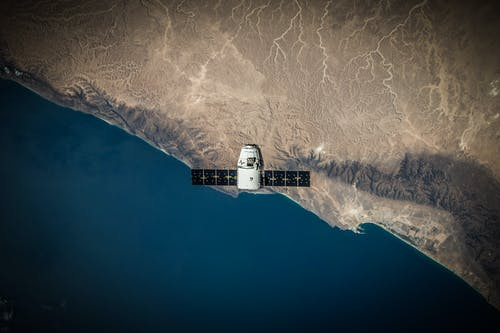

# 1. Active and Retired Rockets :

In [ ]:
visualize('Status_Rocket','h','none','Rocket Status', 'No of Rockets','Active and Ritired Rockets');
size(8,6);

# 2. Type of Missions :

* Here we can see that Prelaunch Failure rate is very low 
* Success rate is really good 
* And Partial Failure is also pretty less 

In [ ]:
visualize('Status_Mission','v','none','Mission Status', 'No of Missions','Types of Missions');
size(8,5);

# 3. No of missions according to Places : 

* **Russia** has done the highest missions even more than **USA**
* Following them there are **Kazakhstan**, **France**, **China** and **Japan**
* **India** comes 7th in the world with respect to no of missions 

In [ ]:
visualize('Places','h','summer','Country Name', 'No of Missions','Number of Missions');
size(8,5);

## Relative frequency plot : 

* From the relative freq plot you can see that though **Russia** has launched more missions than **USA** still there **Success Rate** is higher than **USA**
* From the top 10 countries **India** has the highest **Partial Failure Rate**

In [ ]:
relative_bar('Places', 'Places');
size(10,6)

# 4. No of missions according to locations : 

In [ ]:
visualize('Location','h','winter','Locations', 'No of Missions','Number of Missions');
size(8,5);

## Relative frequency plot : 

In [ ]:
relative_bar('Location', 'Location');
size(10,6)

# 5. No of missions according to top 50 launch complex :

**Site 31/6** has launched the highest missions which is in **Kazakhstan**

In [ ]:
visualize('Launch_Complex','v','copper','Top 50 Launch complex', 'No of Missions','Number of Missions');
size(20,8)

## Relative frequency plot

Among the top 10 launch complexes **Site 1/5** has the highest **Failure Rate** 

**Site 1/5** is also in **Kazakhstan**

In [ ]:
relative_bar('Launch_Complex', 'Top 50 Launch Complex');
size(18,6);

# 6. Total launches from top 50 launch vehicles : 

**Russia's Cosmos-3M(11k65M)** has performed the highest missions

In [ ]:
visualize('Launch_vehicle','v','spring','Top 50 Launch Vehicles', 'Total Launches', 'Lauches per vehichle');
size(20,8);

# 7. Total launches of each day from 1957 : 

* Since **1957** most of the mission are been carried out on **Wednesday**

* And there are less launches on **weekends** and **Monaday** too

In [ ]:
visualize('Launch_Day','v','none','Days','No of Launches', 'Total launches of each day');
size(8,5);

# 8. Launches during the day :

Most of the launches took place in the **Morning** between **7:00 - 12:00**

In [ ]:
time = df[['Time','Company_Name']].groupby('Time').count()
time.reset_index(inplace = True)

In [ ]:
size(8,6)
sns.barplot(x='Time', y='Company_Name',data = time).set_title('Launch Time');
plt.xticks(rotation=90);
plt.ylabel('Total Launches');

# 9. Launches in every year from 1957 : 

* Huge no of missions took place between **1965-1978**

In [ ]:
L_Y = df.sort_values(by = 'Launch_Year')
L_Y = L_Y.groupby('Launch_Year').count()
L_Y.reset_index(inplace = True)

In [ ]:
sns.barplot(x='Launch_Year', y='Company_Name', data = L_Y,
            palette = 'Spectral').set_title('Launches in every year from 1957');
size(20,8)
plt.xticks(rotation= 90);
plt.xlabel('Launch Year');
plt.ylabel('Total Launches');

## Relative frequency plot : 

Before **1970 Failure Rate** was very high 

In [ ]:
ly = df[['Launch_Year','Status_Mission','Company_Name']].groupby(['Launch_Year','Status_Mission']).count()
ly.reset_index(inplace = True)
ly = ly.pivot(index ='Launch_Year', columns ='Status_Mission', values = 'Company_Name')
ly.fillna(value = 0, inplace = True)
ly = ly.astype(int)
ly.sort_values(by='Success', ascending = False, inplace = True)

In [ ]:
ly['Total'] = ly.sum(axis=1)
ly['SuccessFraction'] = ly['Success'] / ly['Total']
ly['PrelaunchFraction'] = ly['Prelaunch Failure'] / ly['Total']
ly['PartialFraction'] = ly['Partial Failure'] / ly['Total']
ly['FailureFraction'] = ly['Failure'] / ly['Total']

In [ ]:
size(18,6)
# plot
plt.bar(ly.index, ly.SuccessFraction, color = '#00d11f');
plt.bar(ly.index, ly.PrelaunchFraction,
        bottom=ly.SuccessFraction, color ='#0353ff');
plt.bar(ly.index, ly.PartialFraction,
        bottom = ly.SuccessFraction + ly.PrelaunchFraction, color = '#ff9a03');
plt.bar(ly.index, ly.FailureFraction,
        bottom = ly.SuccessFraction + ly.PrelaunchFraction + ly.PartialFraction, color = '#ff0303' );
plt.xticks(rotation= 90);
plt.xlabel('Launch Year');
plt.ylabel('Relative Frequency');
plt.title('Relative Success Rate');
# legend
green = mpatches.Patch(color='#00d11f', label='Success')
blue = mpatches.Patch(color='#0353ff', label='Prelaunch Failure')
orange = mpatches.Patch(color='#ff9a03', label='Partial Failure')
red = mpatches.Patch(color='#ff0303', label='Failure')
plt.legend(handles=[green, blue, orange, red], bbox_to_anchor=(1.2, 1), shadow=True)
plt.show();

# 10. Top 15 Launch centers in the world : 

Launch centre **Plesetsk Cosmodrome** has performed the highest launches which is in **Russia**

In [ ]:
s_c = df.groupby('Space_Centre').count()
s_c = s_c.sort_values(by = 'Company_Name')
s_c.reset_index(inplace = True)

In [ ]:
sns.barplot(x='Space_Centre', y='Company_Name', data = s_c.tail(15), 
            palette = 'Reds').set_title('Launches in each Space Centre from 1957');
size(15,6)
plt.xticks(rotation= 80);
plt.xlabel('Top 15 Launch Centres');
plt.ylabel('Total Launches');

# WordArt : 

## Company Names 

In [ ]:
wordCloud = WordCloud(
    background_color='White',
    max_font_size = 50).generate(' '.join(df['Company_Name']))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# 11. Money spent by each company :

In [ ]:
df.head()

In [ ]:
df.Company_Name.unique()

* **RVSN USSR** has spent the most money on space research, way more than the rest

* And then comes **NASA**

In [ ]:
sns.barplot(x='Company_Name', y='Mission_Cost',
            hue ='Status_Mission', data = df).set_title('Money Spent by each company');
size(20,8)
plt.xticks(rotation=90);
# plt.xlabel('Company Name');
plt.ylabel('Money Spent in $ million');

# 12. Heatmap of days and months : 

In [ ]:
hmap = df[['Launch_Month','Launch_Day','Company_Name',]].groupby(['Launch_Month','Launch_Day']).count()
hmap.reset_index(inplace = True)
hmap_ =hmap.pivot(index='Launch_Month',columns = 'Launch_Day', values= 'Company_Name');
hmap_ = hmap_[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
hamp_ = hmap_.loc[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [ ]:
sns.heatmap(hmap_, annot =True, cmap = 'Greys');
size(15,8)
plt.xlabel('Days');
plt.ylabel('Months');
plt.title('Total Launches on each day from 1957');

# 13. Heatmap of months and years : 

In [ ]:
hmap2 = df[['Launch_Year','Launch_Month','Company_Name',]].groupby(['Launch_Year','Launch_Month']).count()
hmap2.reset_index(inplace = True)
hmap2_ =hmap2.pivot(columns='Launch_Year',index = 'Launch_Month', values= 'Company_Name');
hmap2_.fillna(value=0,inplace = True)
hmap2_ = hmap2_.astype(int)
hmap2_ = hmap2_.loc[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [ ]:
sns.heatmap(hmap2_, cmap = 'GnBu');
size(20,8)
plt.xlabel('Years');
plt.ylabel('Months');
plt.title('Total Launches on each year from 1957');

# 14. Animated Map :

In [ ]:
cd = df[['Places','Launch_Year','Company_Name']].groupby(['Places','Launch_Year']).count()
cd.reset_index(inplace= True)
cd = cd.sort_values(by = 'Launch_Year')
cd.rename(columns={'Company_Name' : 'Total Launches'}, inplace= True )

In [ ]:
place_map = px.choropleth(cd, locations ="Places", locationmode = "country names", 
                        color="Total Launches", hover_name="Places", animation_frame="Launch_Year")

place_map.update_layout(
    title_text = 'Launches in each country over the years from 1957',
    title_x = 0.5,
    geo=dict(showocean=True, oceancolor="#7af8ff",
            showland=True, landcolor="white",
            showframe = False))
place_map.show()

**If you liked my work and found this visualization use then Do Upvote this Notebook**

# Thank You! 